## Học phần: Thị giác máy tính
#### Họ tên: Phạm Phước Bảo Tín
#### Mã sinh viên: 22E1020021

## Mô tả dữ liệu
- Bộ dữ liệu về phân loại "Shoe", "Sandal", "Boot". Nguồn dữ liệu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg))
- Ba lớp 3 thư mục riêng, mỗi thư mục 5000 ảnh.


## Chuẩn bị dữ liệu  + Theo dõi từng k

k=1, Accuracy=0.9037
k=2, Accuracy=0.8983
k=3, Accuracy=0.8993
k=4, Accuracy=0.8970
k=5, Accuracy=0.8940
k=6, Accuracy=0.8897
k=7, Accuracy=0.8907
k=8, Accuracy=0.8860
k=9, Accuracy=0.8823
k=10, Accuracy=0.8843
k=11, Accuracy=0.8790
k=12, Accuracy=0.8800
k=13, Accuracy=0.8770
k=14, Accuracy=0.8757
k=15, Accuracy=0.8737


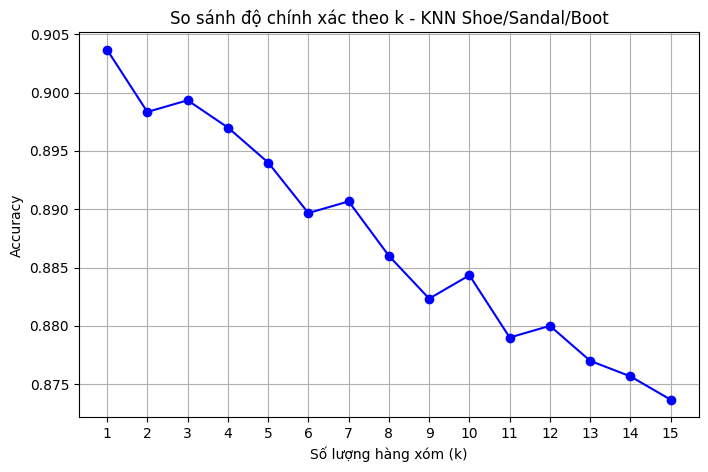

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ======================
# 1. Chuẩn bị dữ liệu
# ======================
data_dir = r"D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\ShoeSandalBoot"
classes = ["Shoe", "Sandal", "Boot"]

IMG_SIZE = 120  # resize ảnh kích thước 120x120

X = []
y = []

for label, class_name in enumerate(classes):
    folder = os.path.join(data_dir, class_name)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

# ======================
# 2. Tiền xử lý & chia dữ liệu
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# 3. So sánh accuracy theo k
# ======================
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("Số lượng hàng xóm (k)")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác theo k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


Chọn k (từ kết quả thử nghiệm trên)

In [62]:
# ======================
# 3. Huấn luyện KNN
# ======================
k=3 
knn_k = KNeighborsClassifier(n_neighbors=k)
knn_k.fit(X_train, y_train)

# ======================
# 4. Đánh giá mô hình
# ======================
y_pred = knn_k.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))



🔹 Accuracy: 0.8993333333333333

🔹 Classification Report:
               precision    recall  f1-score   support

        Shoe       0.88      0.93      0.90      1000
      Sandal       0.96      0.78      0.86      1000
        Boot       0.88      0.99      0.93      1000

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



Vẽ ma trận nhầm lẫn với K đã chọn

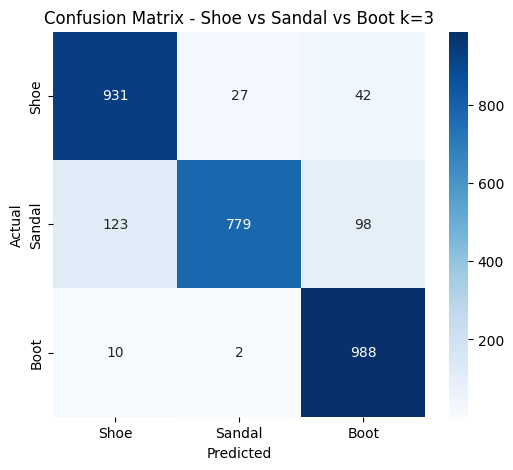

In [63]:
# 5. Ma trận nhầm lẫn
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## Hàm phân loại từ ảnh tải ngẫu nhiên trên internet

In [ ]:
# ======================
# 6. Hàm dự đoán ảnh mới
# ======================
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Không đọc được ảnh:", image_path)
        return
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_flat = img.flatten().reshape(1, -1)
    img_scaled = scaler.transform(img_flat)
    prediction = knn_k.predict(img_scaled)[0]
    confidence_neighbors = knn_k.kneighbors(img_scaled, return_distance=False)

    # Hiển thị ảnh
    plt.imshow(img, cmap="gray")
    plt.title(f"Dự đoán: {classes[prediction]}")
    plt.axis("off")
    plt.show()

    print(f"Ảnh {image_path} được dự đoán là: {classes[prediction]}")
    

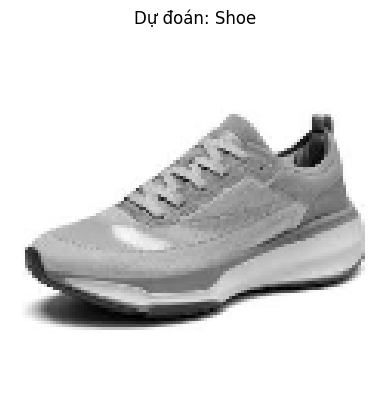

Ảnh D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\t11.jpg được dự đoán là: Shoe
Các hàng xóm gần nhất (index): [[11992  6481 10554]]


In [64]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\t11.jpg")

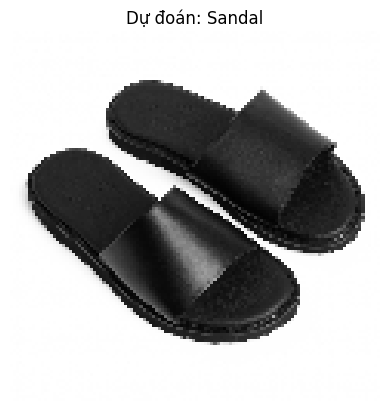

Ảnh D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\t1.jpg được dự đoán là: Sandal
Các hàng xóm gần nhất (index): [[7797 1093 7859]]


In [44]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\t1.jpg")

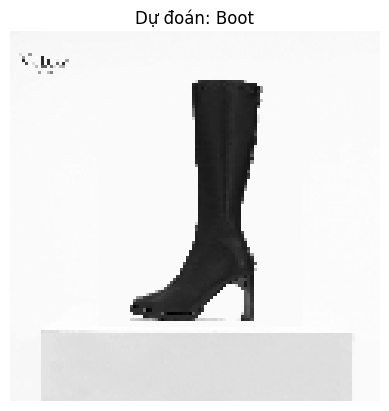

Ảnh D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\t12.jpg được dự đoán là: Boot
Các hàng xóm gần nhất (index): [[9549 2564 1817]]


In [59]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\HUET\NAM 4\NAM 4 KI I\computer_vision\datasets\t12.jpg")